# Import
Import the required tools for the model and analyitics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Setup Simulation
Here I will create and configure the different components needed for the "simulation," i.e. the random model.

In [2]:
class Candidate:
    def __init__(self) -> None:
        self.tries = 0
        self.has_passed = False
    
    # Returns if the test was conducted
    def do_test(self, pass_rate=0.4):
        if self.has_passed:
            return False
        
        # "Do" the test
        self.tries += 1
        self.has_passed = self.will_pass(pass_rate)
        
        return True
    
    # Returns a simple random number based on a pass rate
    def will_pass(self, pass_rate=0.4):
        return random.uniform(0, 1) <= pass_rate

Some parameters for the simulation, feel free to change!

In [3]:
TOTAL_CANDIDATES = 1000000

In [4]:
PASS_RATE = 0.4

Create all of the candidates in an object

In [5]:
CANDIDATES = [Candidate() for i in range(0, TOTAL_CANDIDATES)]

In [6]:
# Checks if everyone has passed their test
def everyone_passed():
    for cand in CANDIDATES:
        if not cand.has_passed:
            return False
    
    return True

# Run the "Simulation"
Run the simulation while not everyone (in the set) has passed their driving test.

In [7]:
while not everyone_passed():
    # Loop over in all of the candidates
    for cand in CANDIDATES:
        # Take the "driving test"
        cand.do_test(PASS_RATE)

# Dataframe
In this section, I will load the data calculated into different dataframes for later processing and visualisation

In [8]:
import pandas as pd

## Candidate Dataframe
This just contains all of the results for the "simulation" just ran so that I can find the mean etc. of the data.

In [9]:
# Make the dataframe
cand_df = pd.DataFrame.from_dict({
    'tries': [c.tries for c in CANDIDATES]
})

In [10]:
cand_df['tries'].value_counts()

1     401130
2     239179
3     144402
4      86268
5      51686
6      30882
7      18626
8      11051
9       6674
10      4090
11      2377
12      1437
13       865
14       518
15       307
16       202
17       113
18        71
19        49
20        34
21        14
22         9
23         8
24         5
25         1
27         1
28         1
Name: tries, dtype: int64

In [11]:
cand_df['tries'].describe()

count    1000000.000000
mean           2.496655
std            1.935892
min            1.000000
25%            1.000000
50%            2.000000
75%            3.000000
max           28.000000
Name: tries, dtype: float64

As you can see, the **mean** amount of times taken before someone passes their test is about **2.5** times!

## Frequency Dataframe
This is just a dataframe used to store the frequency and total of each of the total tries.

In [12]:
f_df = pd.DataFrame.from_dict({
    'tries': [i for i in range(1, len(cand_df['tries'].value_counts()) + 1)],
    'total': [i for i in cand_df['tries'].value_counts()],
}).set_index('tries')

In [13]:
f_df['frequency'] = [i/f_df['total'].sum() for i in f_df['total'].values]

In [14]:
f_df = f_df.sort_index()

In [15]:
f_df

,total,frequency
tries,,
1,401130,0.401130
2,239179,0.239179
3,144402,0.144402
4,86268,0.086268
5,51686,0.051686
6,30882,0.030882
7,18626,0.018626
8,11051,0.011051
9,6674,0.006674


# Plots
I will now plot the data that we have just generated!

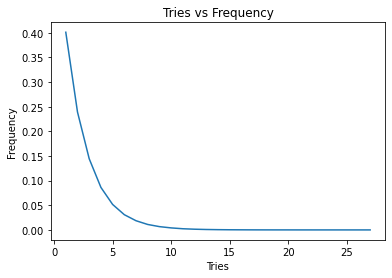

In [16]:
f_df['frequency'].plot()
plt.xlabel('Tries')
plt.ylabel('Frequency')
plt.title('Tries vs Frequency')

plt.show()

# Modelling
THe curve above appears to be a simple curve of `y = p^x`, where `y` is the frequency, `p` is the pass rate, and `x` is the amount of tests taken, the plot below shows this example.

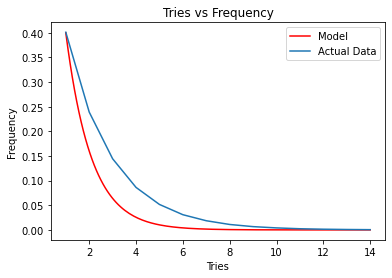

In [18]:
MAX_WIDTH = round(len(f_df) / 2)

# y = p^x
def model(x):
    return PASS_RATE**x # PASS_RATE ^ x

x = np.linspace(1, MAX_WIDTH, 10*MAX_WIDTH)
y = [model(i) for i in x]

# Plot them
plt.plot(x, y, 'r')
f_df['frequency'].iloc[0:MAX_WIDTH].plot()

# Legend
plt.legend(['Model', 'Actual Data'])

# Label Axies
plt.xlabel('Tries')
plt.ylabel('Frequency')
plt.title('Tries vs Frequency')

plt.show()

As you can see, my model is slightly off but it still resembles the overall shape of the curve.